# **A. PERFILADO DE DATOS**

In [2]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [3]:
# Se cargan los datos
data= pd.read_csv("updated_pollution_dataset.csv")

data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
data['Air Quality'] = data['Air Quality'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    5000 non-null   float64 
 1   Humidity                       5000 non-null   float64 
 2   PM2.5                          5000 non-null   float64 
 3   PM10                           5000 non-null   float64 
 4   NO2                            5000 non-null   float64 
 5   SO2                            5000 non-null   float64 
 6   CO                             5000 non-null   float64 
 7   Proximity_to_Industrial_Areas  5000 non-null   float64 
 8   Population_Density             5000 non-null   int64   
 9   Air Quality                    5000 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 356.8 KB


In [6]:
#Instalar pandas profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fe99c9245998df8f190759cc29de472bb0cf758d4ee48a220d9341dc4ec086f4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [7]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

Output hidden; open in https://colab.research.google.com to view.

In [8]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Diagnóstico de las dimensiones según el perfilado:**
* Completitud: no existen missing en las variables
* Exactitud: En la variables PM10 y SO2 hay valores negativos, lo que podría indicar atípicos debido que estas medidas deben ser positivas o cero.
* Conformidad: Los datos están conforme los formatos esperados
* Oportunidad: No tenemos la fecha
* Duplicidad: No hay duplicidad en los datos
* Integridad: Es claro

# **B. LIMPIEZA  DE LOS DATOS**
1. Detección de duplicados
2. Selección de datos
3. Limpieza de atípicos
4. Limpieza de nulos

**1. Detección de duplicados**

In [9]:
# No hay duplicados

**2. Selección de Datos**

In [10]:
# No hay variables irrelevantes

**3. Limpieza de datos atípicos: se asigna nulo**

In [11]:
#Se asigna valor nulo a los atípicos
data.PM10[data['PM10']<0]=np.nan #Nulo
data.SO2[data['SO2']<0]=np.nan #Nulo

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    5000 non-null   float64 
 1   Humidity                       5000 non-null   float64 
 2   PM2.5                          5000 non-null   float64 
 3   PM10                           4999 non-null   float64 
 4   NO2                            5000 non-null   float64 
 5   SO2                            4970 non-null   float64 
 6   CO                             5000 non-null   float64 
 7   Proximity_to_Industrial_Areas  5000 non-null   float64 
 8   Population_Density             5000 non-null   int64   
 9   Air Quality                    5000 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 356.8 KB


<ipython-input-11-4f3221f4cab6>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.PM10[data['PM10']<0]=np.nan #Nulo
<ipython-input-11-4f3221f4cab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

**4. Limpieza de datos nulos: Imputación**

In [12]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['PM10', 'SO2']] = ImpNumeros.fit_transform(data[['PM10', 'SO2']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    5000 non-null   float64 
 1   Humidity                       5000 non-null   float64 
 2   PM2.5                          5000 non-null   float64 
 3   PM10                           5000 non-null   float64 
 4   NO2                            5000 non-null   float64 
 5   SO2                            5000 non-null   float64 
 6   CO                             5000 non-null   float64 
 7   Proximity_to_Industrial_Areas  5000 non-null   float64 
 8   Population_Density             5000 non-null   int64   
 9   Air Quality                    5000 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 356.8 KB


In [13]:
#Valores de la imputación
print(ImpNumeros.statistics_)

[30.22444489 10.08120724]


# **C. MEJORA DE LOS DATOS**


**1. Análisis de correlaciones**

In [14]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, drop_first=False, dtype=int)
data_num.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0,0,1,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0,0,1,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0,0,1,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,0,0,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,0,0,0


In [15]:
#Correlaciones
data_num.corr()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
Temperature,1.000000,0.466456,0.323840,0.425596,0.591969,0.572090,0.685258,-0.589564,0.481692,-0.617534,0.511845,0.011006,0.359828
Humidity,0.466456,1.000000,0.273366,0.359036,0.491977,0.465066,0.567540,-0.479646,0.411630,-0.516509,0.408038,0.006414,0.319215
PM2.5,0.323840,0.273366,1.000000,0.972946,0.333004,0.302178,0.395179,-0.315766,0.278957,-0.340247,0.295680,0.008523,0.185191
PM10,0.425596,0.359036,0.972946,1.000000,0.439943,0.404795,0.518747,-0.424974,0.365835,-0.454476,0.381371,0.009095,0.260169
NO2,0.591969,0.491977,0.333004,0.439943,1.000000,0.573998,0.710792,-0.607710,0.510938,-0.639251,0.531570,0.001695,0.382299
SO2,0.572090,0.465066,0.302178,0.404795,0.573998,1.000000,0.683253,-0.572320,0.477642,-0.605191,0.496070,-0.005192,0.375100
CO,0.685258,0.567540,0.395179,0.518747,0.710792,0.683253,1.000000,-0.707581,0.593389,-0.748888,0.604967,0.005923,0.456686
Proximity_to_Industrial_Areas,-0.589564,-0.479646,-0.315766,-0.424974,-0.607710,-0.572320,-0.707581,1.000000,-0.498058,0.805623,-0.353867,-0.265941,-0.416609
Population_Density,0.481692,0.411630,0.278957,0.365835,0.510938,0.477642,0.593389,-0.498058,1.000000,-0.526444,0.433390,0.000607,0.319022
Air Quality_Good,-0.617534,-0.516509,-0.340247,-0.454476,-0.639251,-0.605191,-0.748888,0.805623,-0.526444,1.000000,-0.272166,-0.534522,-0.408248


<Axes: >

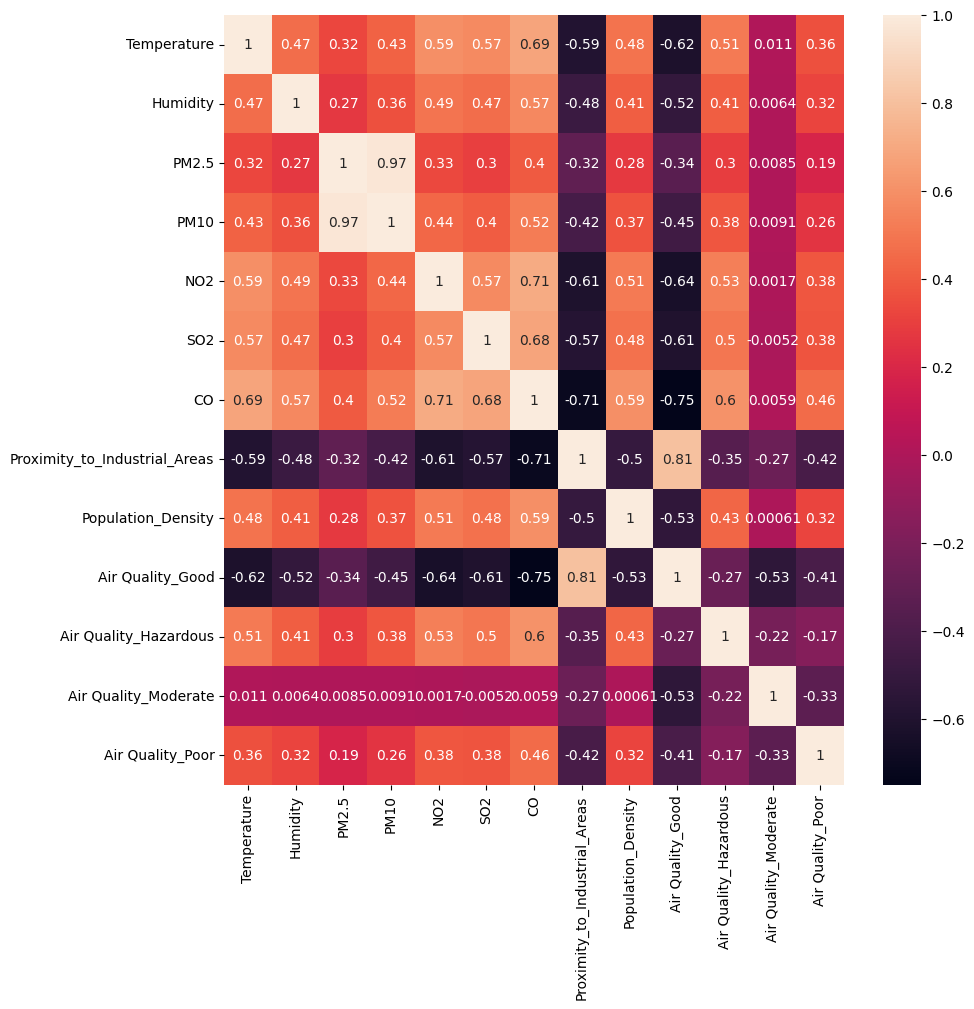

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [17]:
# Redundancias: correlaciones mayores a 0.8 en  la matriz
# Irrelevancia: correlaciones muy bajas con la variable objetivo (menor a 0.05)
# Elimino PM2.5 y Air Quality_Good

data = data.drop('PM2.5',axis=1) #Eliminamos PM2.5 por ser redundante, axis=1 indica que es una columna
data = data.drop('Proximity_to_Industrial_Areas',axis=1) #Eliminamos el Air Quality_Good por ser redundante, axis=1 indica que es una columna
data.head()

,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,29.8,59.1,17.9,18.9,9.2,1.72,319,Moderate
1,28.3,75.6,12.2,30.8,9.7,1.64,611,Moderate
2,23.1,74.7,33.8,24.4,12.6,1.63,619,Moderate
3,27.1,39.1,6.3,13.5,5.3,1.15,551,Good
4,26.5,70.7,16.0,21.9,5.6,1.01,303,Good


2. Balanceo de datos (Clasificación)

<ipython-input-18-af1800c3961c>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Air Quality']).plot(kind="bar")


<Axes: xlabel='Air Quality'>

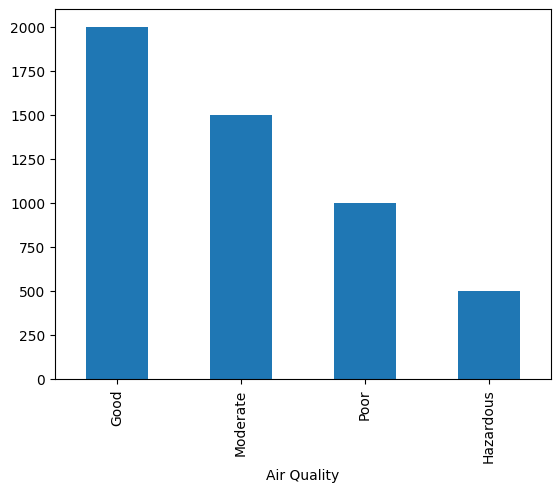

In [18]:
#Variable objetivo
pd.value_counts(data['Air Quality']).plot(kind="bar")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Temperature         5000 non-null   float64 
 1   Humidity            5000 non-null   float64 
 2   PM10                5000 non-null   float64 
 3   NO2                 5000 non-null   float64 
 4   SO2                 5000 non-null   float64 
 5   CO                  5000 non-null   float64 
 6   Population_Density  5000 non-null   int64   
 7   Air Quality         5000 non-null   category
dtypes: category(1), float64(6), int64(1)
memory usage: 278.6 KB


In [20]:
from imblearn.over_sampling import SMOTE

# Usar SMOTE ya que todas las variables predictoras son numéricas
sm = SMOTE(k_neighbors=2, random_state=42)

X = data.drop('Air Quality', axis=1)  # Variables predictoras
Y = data['Air Quality']               # Variable objetivo

X_bal, Y_bal = sm.fit_resample(X, Y)  # Aplicar el sobremuestreo

<Axes: xlabel='Air Quality'>

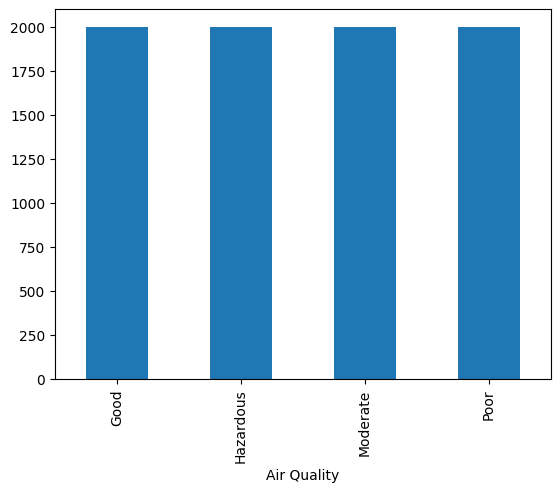

In [21]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Air Quality']=Y_bal
data['Air Quality'].value_counts().plot(kind='bar')

In [22]:
#Guardamos los datos preparados
data.to_csv('./datos_numéricos.csv')